# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import requests
import time 
import csv
#Import API key
from api_keys import weather_api_key
from citipy import citipy
# get the output file cities (CSV)
cities_file = "../output_data/cities.csv"
# what is the range of latititudes and longitudes
lat_range = (-90,90)
long_range = (-180,180)

## Generate Cities List

In [3]:
# We want a list of paired latititudes and longitudes
lat_longs = []
# We want a list of cities
cities = []
# We want a set of random lat and lng combinations
lat_random = np.random.uniform(low=-90.000, high=90.000, size=1500)
long_random = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_longs = zip(lat_random, long_random)

#create for loop
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0],lat_long[1]).city_name
    if city not in cities:
        cities.append(city)
#Print 
##print(len(cities))
print(cities)

['urdzhar', 'karratha', 'manicore', 'tuktoyaktuk', 'chiredzi', 'hermanus', 'jamestown', 'ribeira grande', 'port alfred', 'parabel', 'fortuna', 'cape town', 'avarua', 'rikitea', 'mataura', 'punta arenas', 'shingu', 'naze', 'busselton', 'amderma', 'bredasdorp', 'labuhan', 'roma', 'la rioja', 'saskylakh', 'tubinskiy', 'butembo', 'kudahuvadhoo', 'thompson', 'te anau', 'vaini', 'nikolskoye', 'adrar', 'geraldton', 'ushuaia', 'utica', 'longyearbyen', 'raton', 'hithadhoo', 'roald', 'illoqqortoormiut', 'upington', 'port elizabeth', 'belushya guba', 'kahului', 'fredericton', 'meulaboh', 'osmanabad', 'orodara', 'port lincoln', 'bengkulu', 'longfeng', 'puerto ayora', 'butaritari', 'albany', 'pierre', 'nuuk', 'barentsburg', 'pucallpa', 'ambulu', 'grodkow', 'guerrero negro', 'faya', 'denpasar', 'cootamundra', 'aklavik', 'barrow', 'alofi', 'airai', 'klaksvik', 'marawi', 'saint-philippe', 'kodiak', 'kapaa', 'cherskiy', 'taolanaro', 'hobart', 'puerto maldonado', 'umzimvubu', 'brae', 'atuona', 'arraial 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
api_key = weather_api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [5]:
# create empty list from the attributes in the cities (CSV)
City_NM = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_temp = []
Wind_speed = []

record = 1
record_set = 1
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Create for loop
for city in cities:
    try: 
        response = requests.get(f"{url}&q={city}").json()
        City_NM.append(response["name"])
        Cloudiness.append(response["clouds"]["all"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Humidity.append(response["main"]["humidity"])
        Max_temp.append(response["main"]["temp_max"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} of Set {record_set} | {city_record}")
        ##print(f"{url}&q={city}")
        record = record + 1   
         # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)   
    # If no record found "skip" to next call
    except:
        print("Unable to find City. Skip")
    continue 

print('''
-----------------------------
Data Retrival Complete
-----------------------------''')



Beginning Data Retrieval
-------------------------------
Unable to find City. Skip
Processing Record 1 of Set 1 | Karratha
Processing Record 2 of Set 1 | Manicoré
Processing Record 3 of Set 1 | Tuktoyaktuk
Processing Record 4 of Set 1 | Chiredzi
Processing Record 5 of Set 1 | Hermanus
Processing Record 6 of Set 1 | Jamestown
Processing Record 7 of Set 1 | Ribeira Grande
Processing Record 8 of Set 1 | Port Alfred
Processing Record 9 of Set 1 | Parabel'
Processing Record 10 of Set 1 | Fortuna
Processing Record 11 of Set 1 | Cape Town
Processing Record 12 of Set 1 | Avarua
Processing Record 13 of Set 1 | Rikitea
Processing Record 14 of Set 1 | Mataura
Processing Record 15 of Set 1 | Punta Arenas
Processing Record 16 of Set 1 | Shingū
Processing Record 17 of Set 1 | Naze
Processing Record 18 of Set 1 | Busselton
Unable to find City. Skip
Processing Record 19 of Set 1 | Bredasdorp
Processing Record 20 of Set 1 | Labuhan
Processing Record 21 of Set 1 | Rome
Processing Record 22 of Set 1 | La

Processing Record 188 of Set 1 | Catuday
Processing Record 189 of Set 1 | East London
Processing Record 190 of Set 1 | Manado
Processing Record 191 of Set 1 | Guntur
Processing Record 192 of Set 1 | Badou
Unable to find City. Skip
Processing Record 193 of Set 1 | Arlit
Processing Record 194 of Set 1 | Nouadhibou
Unable to find City. Skip
Processing Record 195 of Set 1 | Rjukan
Unable to find City. Skip
Unable to find City. Skip
Processing Record 196 of Set 1 | Saint-Marc-des-Carrieres
Processing Record 197 of Set 1 | Ipixuna
Unable to find City. Skip
Processing Record 198 of Set 1 | Caravelas
Processing Record 199 of Set 1 | Mouzourás
Processing Record 200 of Set 1 | Cabedelo
Processing Record 201 of Set 1 | Shimoda
Processing Record 202 of Set 1 | Poum
Processing Record 203 of Set 1 | São João da Barra
Processing Record 204 of Set 1 | Bandarbeyla
Processing Record 205 of Set 1 | Turukhansk
Processing Record 206 of Set 1 | Lebu
Processing Record 207 of Set 1 | Tual
Processing Record 20

Processing Record 372 of Set 1 | San Quintín
Processing Record 373 of Set 1 | Viedma
Processing Record 374 of Set 1 | Bhādāsar
Processing Record 375 of Set 1 | Gigmoto
Processing Record 376 of Set 1 | Superior
Processing Record 377 of Set 1 | Nouakchott
Processing Record 378 of Set 1 | Banjar
Processing Record 379 of Set 1 | Bőny
Processing Record 380 of Set 1 | Iquique
Unable to find City. Skip
Processing Record 381 of Set 1 | Ranfurly
Processing Record 382 of Set 1 | Diego de Almagro
Processing Record 383 of Set 1 | Sibu
Processing Record 384 of Set 1 | Dhārchula
Processing Record 385 of Set 1 | Punta Alta
Processing Record 386 of Set 1 | Kirkwall
Processing Record 387 of Set 1 | Yumen
Processing Record 388 of Set 1 | Ca Mau
Processing Record 389 of Set 1 | Torbay
Processing Record 390 of Set 1 | Mizdah
Processing Record 391 of Set 1 | Suruç
Processing Record 392 of Set 1 | College
Processing Record 393 of Set 1 | Salalah
Processing Record 394 of Set 1 | Sorong
Processing Record 395 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
City_Weather_Data = {
    "City": City_NM,
    "Cloudiness":Cloudiness, 
    "Country":Country,
    "Date":Date, 
    "Humidity": Humidity,
    "Lat":Lat, 
    "Lng":Lng, 
    "Max Temp": Max_temp,
    "Wind Speed":Wind_speed
}

# Create a data frame from dictionary
Weather_df = pd.DataFrame(City_Weather_Data)
Weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Karratha,0,AU,1599618756,20,-20.74,116.85,94.24,8.81
1,Manicoré,8,BR,1599619056,83,-5.81,-61.30,82.40,3.36
2,Tuktoyaktuk,90,CA,1599619057,88,69.45,-133.04,35.60,4.70
3,Chiredzi,0,ZW,1599619059,80,-21.05,31.67,59.49,4.83
4,Hermanus,5,ZA,1599619061,89,-34.42,19.23,57.00,1.01


In [7]:
Weather_df.to_csv('../output_data/weather_dataframe.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
Humid_df = Weather_df.loc[Weather_df["Humidity"] > 100.00]
Humid_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

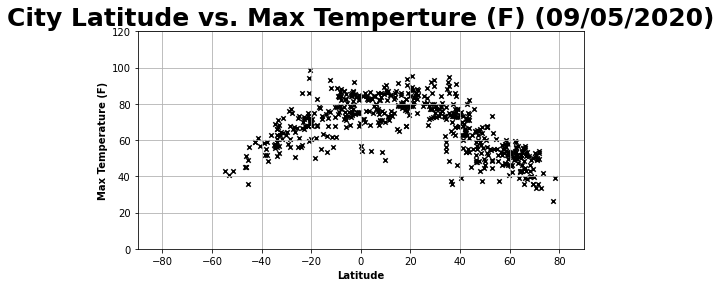

In [9]:
Weather_df.plot(kind="scatter", x="Lat", y="Max Temp", marker='x',color="k",figsize=(8,4))
plt.title("City Latitude vs. Max Temperture (F) (09/05/2020)", fontsize=25, fontweight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Max Temperature (F)", weight="bold")
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(0, 120)
plt.savefig("../output_data/LatitudevsTemperature.png")
plt.show()

## Latitude vs. Humidity Plot

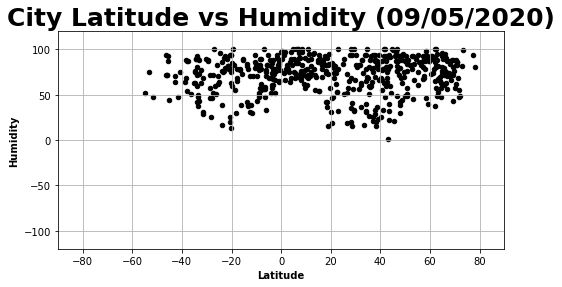

In [10]:
Weather_df.plot(kind="scatter", x="Lat", y="Humidity", color='k', marker='o', figsize=(8,4))
plt.title("City Latitude vs Humidity (09/05/2020)", fontsize=25, fontweight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Humidity", weight="bold")
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(-120, 120)
plt.savefig("../output_data/LatitudevsHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

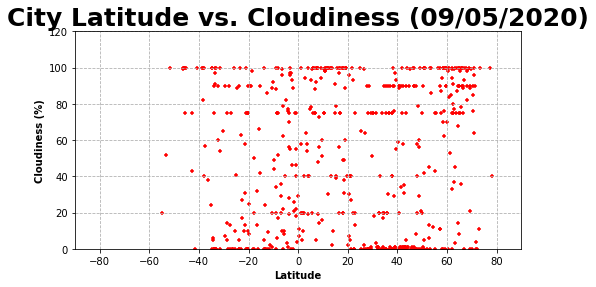

In [ ]:
Weather_df.plot(kind="scatter", x="Lat", y="Cloudiness", color="red", marker='+', figsize=(8,4))
plt.title("City Latitude vs. Cloudiness (09/05/2020)", fontsize=25, fontweight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Cloudiness (%)", weight="bold")
plt.grid(ls="--")
plt.xlim(-90, 90)
plt.ylim(0, 120)
plt.savefig("../output_data/LatitudevsCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

In [ ]:
Weather_df.plot(kind="scatter", x="Lat", y="Wind Speed", color='y', marker='^', figsize=(8,4))
plt.title("City Latitude vs Wind Speed (mph) (09/05/2020)", fontsize=25, fontweight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Wind Speed (mph)", weight="bold")
plt.grid(ls="--")
plt.xlim(-90, 90)
plt.ylim(-10, 55)
plt.savefig("../output_data/LatitudevsWindSpeed.png")
plt.show()

## Observations
There's not a hudge relationship between wind speed and latititude. The speed of the wind seems to lie within 0 at 18 MPH. The furthest from the equator being a latitude around ~65.

There's a relationship among the max temperture.  Highest temperature found at a latitude of 35 latitude. The temperture begins to in increase as you get closer to the equator then begins to decreases after a latitude of 40 , further away from the equator.

As you go further up in latitude, the hummidity is observed the most at 80%.

I'm not seeing a strong relationship any of the cities, latitude and how cloudy it is. The central tendancy seems to occur at 0%, 78% and 100% of Cloudiness."


